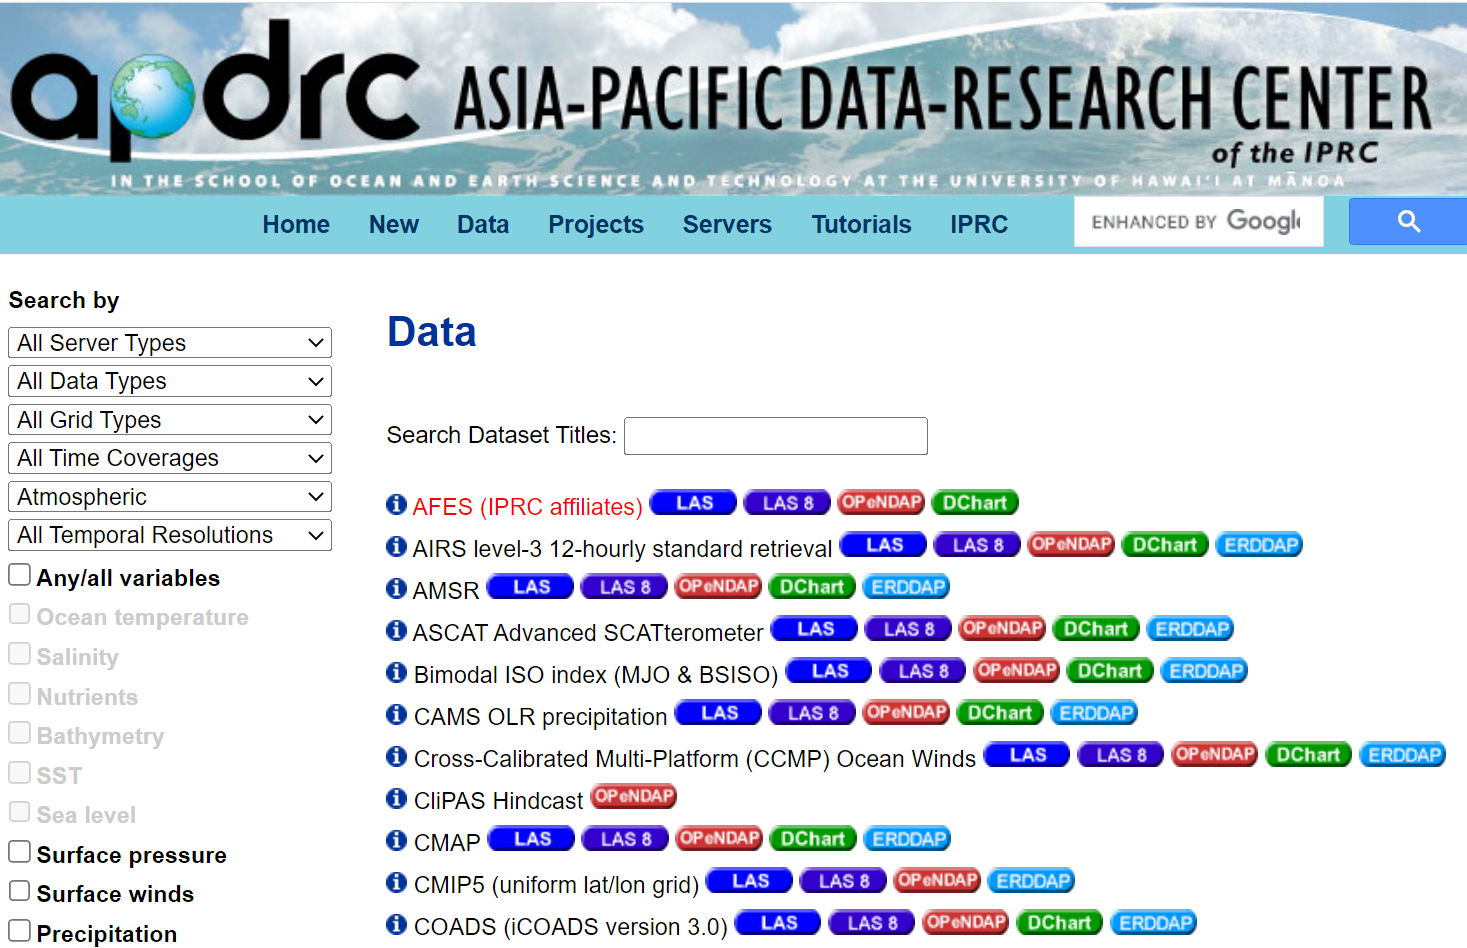

------------------------------------------------------------------------------------------------------------------------------------------

- Uma das grandes dificuldades em trabalhar com dados `globais` de precipitação por satélite, é a necessidade de **baixar** e processar um grande volume de dados. O que muitas das vezes demanda um computador com um bom processamento e uma forte capacidade para armazenar esses dados.
- Para resolver esse problema, podemos acessar a base de dados disponibilizados em algum site ou FTP.
- Para isto o **Asia-Pacific Data Research Center** que é parte do International Pacific Research Center da **Universidade do Hawai** em Mānoa, financiado em parte pela the National Oceanic and Atmospheric Administration (NOAA) disponibiliza uma série de conjuntos de dados atmosféricos através do protocolo [**OPEnDAP**](http://apdrc.soest.hawaii.edu/data/data.php?discipline_index=3) como:
    1. [GPM IMERG L3 precipitation](http://apdrc.soest.hawaii.edu/dods/public_data/satellite_product/GPM_IMERG)
    2. [ECMWF ERA5](http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/ERA5)
    3. [LIS-OTD Lightning](http://apdrc.soest.hawaii.edu/dods/public_data/satellite_product/LIS-OTD-lightning-data)
    4. [CMIP5](http://apdrc.soest.hawaii.edu/dods/public_data/CMIP5/)
    5. E etc  
- Para ler os dados direto da nuvem podemos utilizar a função [**open_dataset**](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html) da biblioteca [xarray](https://docs.xarray.dev/en/stable/) do Python. Como exemplo, para ler dados de precipitação diária do IMERGE:
  - ds = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/GPM_IMER
/daily')


------------------------------------------------------------------------------------------------------------------------------------------
# Descrição dos dados:


- **Nome dos dados:** GOES Precipitation index (GPI).
- **Documentação dos dados:**http://apdrc.soest.hawaii.edu/dods/public_data/satellite_product/GOES/p
- **URL dos dados:** http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/GPM_IMERG/dail


- **Perío00Z01JAN1997 to 00Z31AUG2023EC2023
- **Range Latit-39.50000000000°N to 39.50000000000°N
 (80 points, avg. res. 1.0°)pontos)
- **Range Longi0.50000000000°E to 359.50000000000°E
 (360 points, avg. res. 1.0°) pontos)
- **Resolução eacial:** 0.1$^{o}$
- **Resolução temporal:** diário
- **ariáveisgpi 
daily averaged rainfall mm/dals for the day (count)

Importa bibliotecas

In [1]:
import xarray as xr
import time
import proplot as pplt
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

Leitura do arquivo

In [2]:
%%time
url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/GOES/daily'
ds = xr.open_dataset(url) 
ds

CPU times: total: 734 ms
Wall time: 5.42 s


<xarray.Dataset>
Dimensions:  (time: 9739, lat: 80, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1997-01-01 1997-01-02 ... 2023-08-31
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 36.5 37.5 38.5 39.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    gpi      (time, lat, lon) float32 ...
Attributes:
    title:          Daily GPI   (1 x 1 deg lat/lon)
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/gpi.php
    history:        Fri Sep 08 13:46:34 HST 2023 : imported by GrADS Data Ser...

Transforma coordenadas de longitude de **0 à 60 graus** para **-180 a 180 graus**

In [3]:
ds.coords['lon'] = ((ds.coords['lon'] + 180) % 360) - 180
ds = ds.sortby(ds.lon)
ds

<xarray.Dataset>
Dimensions:  (time: 9739, lat: 80, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1997-01-01 1997-01-02 ... 2023-08-31
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 36.5 37.5 38.5 39.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    gpi      (time, lat, lon) float32 ...
Attributes:
    title:          Daily GPI   (1 x 1 deg lat/lon)
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/gpi.php
    history:        Fri Sep 08 13:46:34 HST 2023 : imported by GrADS Data Ser...

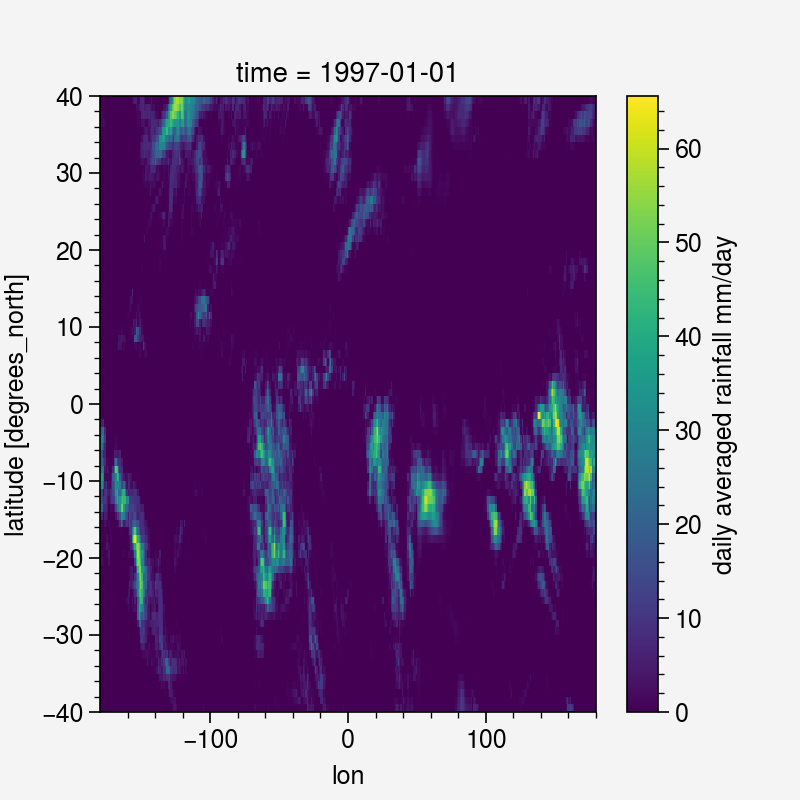

In [4]:
# gráfico simples
ds['gpi'][0,:,:].plot()

Gráfico completo

In [5]:
# limites da região
lonmin, lonmax = -80, -30
latmin, latmax = -40, 10

# recorta os dados 
ds_2022 = ds.sel(time=slice('2022-01-01','2022-12-31'),
                 lon=slice(lonmin, lonmax),
                 lat=slice(latmin, latmax))

# chuva do ano
ds_2022_soma = ds_2022.sum(dim='time')
ds_2022_soma

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 50)
Coordinates:
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 5.5 6.5 7.5 8.5 9.5
  * lon      (lon) float64 -79.5 -78.5 -77.5 -76.5 ... -33.5 -32.5 -31.5 -30.5
Data variables:
    gpi      (lat, lon) float32 398.7 398.1 402.5 ... 1.46e+03 1.481e+03

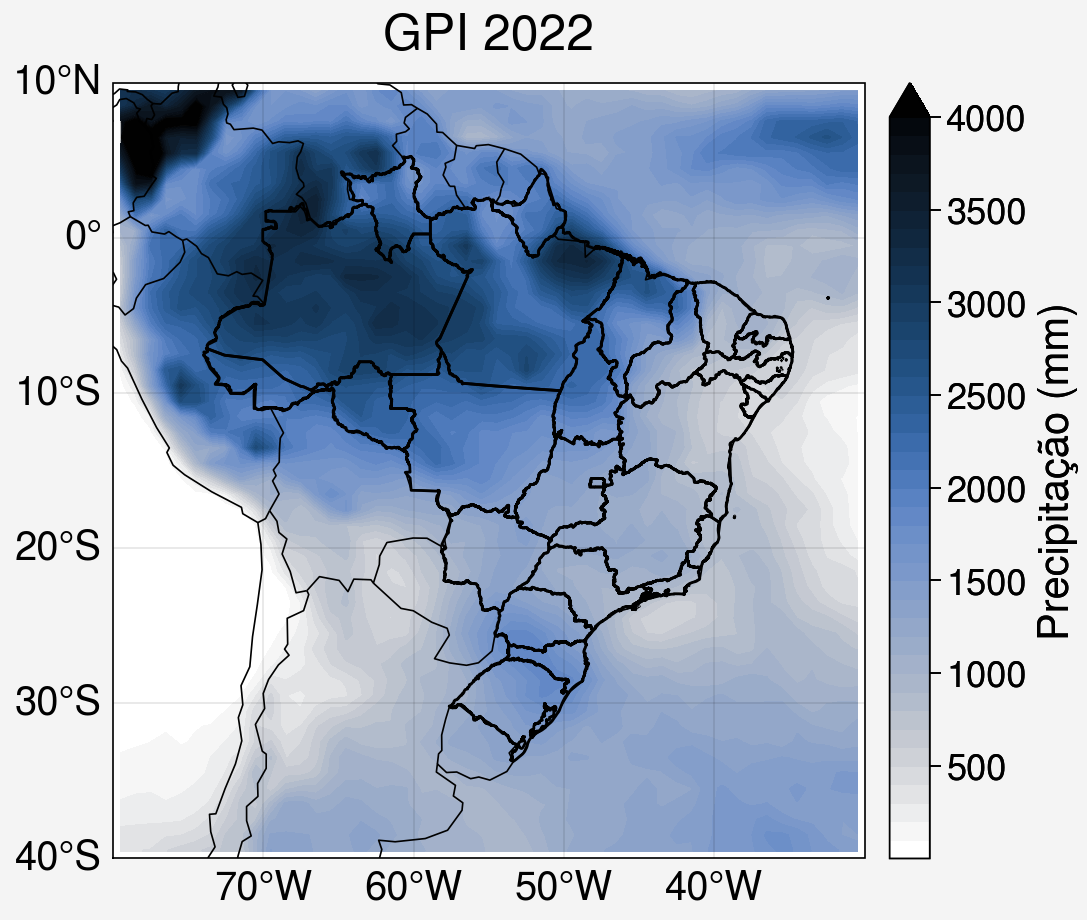

In [6]:
# cria a moldura da figura
fig, ax = pplt.subplots(axwidth=4, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=10, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          title='GPI 2022',
          small='20px', large='25px')
 
#.salem.roi(shape=shapefile_brasil),
# plota mapa
map1 = ax.contourf(ds_2022_soma['lon'],
                   ds_2022_soma['lat'],
                   ds_2022_soma['gpi'],              
                   extend='max', cmap='oslo_r',
                   levels=pplt.arange(0.1, 4000., 100))

# plota contorno dos Estados do Brasil
estados = gpd.read_file('https://raw.githubusercontent.com/giuliano-oliveira/geodata-br-states/main/geojson/br_states.json')
estados.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=1, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Precipitação (mm)', ticks=500, ticklabelsize=13, labelsize=15)

# salva figura
fig.save('GPI.jpg', dpi=300)